# Bài 5: Pandas (part 3)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_excel("data/invoice_2011_07.xlsx")

In [3]:
# Head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom
1,559518,22055,MINI CAKE STAND HANGING STRAWBERY,1,07/08/2011 16:11,3.29,NaN,United Kingdom
2,559518,22179,SET 10 NIGHT OWL LIGHTS,1,07/08/2011 16:11,13.29,NaN,United Kingdom
3,559518,22297,HEART IVORY TRELLIS SMALL,1,07/08/2011 16:11,2.46,NaN,United Kingdom
4,559518,22352,LUNCH BOX WITH CUTLERY RETROSPOT,1,07/08/2011 16:11,4.96,NaN,United Kingdom


- Tạo cột revenue

In [4]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom,9.78
1,559518,22055,MINI CAKE STAND HANGING STRAWBERY,1,07/08/2011 16:11,3.29,NaN,United Kingdom,3.29


## 1. Thống kê mô tả

- Doanh thu thấp nhất trên 1 hóa đơn

In [5]:
df["Revenue"].min()

-6497.47

- Kiểm tra xem kết quả âm là do đâu

In [6]:
# Lọc ra những dòng có revenue < 0
df.loc[df["Revenue"] < 0, :].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
279,C559530,22655,VINTAGE RED KITCHEN CABINET,-1,07/10/2011 12:04,125.00,14808.0,United Kingdom,-125.00
285,C559531,22846,BREAD BIN DINER STYLE RED,-1,07/10/2011 12:07,16.95,14808.0,United Kingdom,-16.95
286,C559533,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,07/10/2011 12:10,2.95,17126.0,United Kingdom,-2.95
287,C559534,47594B,SCOTTIES DESIGN WASHBAG,-2,07/10/2011 12:11,1.95,16283.0,United Kingdom,-3.90
469,C559540,21850,BLUE DIAMANTE PEN IN GIFT BOX,-36,07/10/2011 12:39,4.25,18024.0,United Kingdom,-153.00


- Nguyên nhân: quantity có thể âm 
    - Quantity < 0: công ty nhập hàng vào
    - Quantity > 0: công ty bán hàng ra

- Do vậy cần lọc ra những hóa đơn liên quan đến BÁN HÀNG

In [7]:
df_sell = df.loc[df["Quantity"] > 0, :].copy() # Giải thích copy sau
df_sell.shape

(27630, 9)

- Tính lại giá trị hóa đơn nhỏ nhất

In [8]:
df_sell["Revenue"].min()

0.0

- Hóa đơn có Revenue bằng 0 là những hóa đơn như thế nào?

In [9]:
df_sell.loc[df_sell["Revenue"] == 0, :].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
1073,559602,84686,NaN,23,07/11/2011 11:26,0.0,NaN,United Kingdom,0.0
1074,559603,79337,NaN,1,07/11/2011 11:27,0.0,NaN,United Kingdom,0.0
1075,559604,22084,NaN,3,07/11/2011 11:27,0.0,NaN,United Kingdom,0.0
4121,559825,21067,NaN,23,07/12/2011 17:41,0.0,NaN,United Kingdom,0.0
5989,559946,21578,NaN,200,7/14/2011 10:26,0.0,NaN,United Kingdom,0.0


- Tính giá trị hóa đơn cao nhất

In [10]:
df["Revenue"].max()

4287.63

- Tính doanh thu trung bình trên mỗi hóa đơn

In [11]:
df["Revenue"].mean()

17.542354310620283

- Tính median doanh thu trên mỗi hóa đơn

In [12]:
df["Revenue"].median()

8.5

## 2. Group by and aggregation

- Often group by columns with limited distinct values
- Always perform aggregration after group by

### A) Load

In [13]:
# Tip data from seaborn
df = sns.load_dataset("tips")

### B) Inspect

In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
df.shape

(244, 7)

In [16]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### C) Examples with group by (1 column)

In [17]:
# Mean bill by sex
df.groupby("sex")["total_bill"].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [18]:
# median bill by sex
df.groupby("sex")["total_bill"].median()

sex
Male      18.35
Female    16.40
Name: total_bill, dtype: float64

Note: results are `Series`

In [19]:
# Save the aggregation to result
result = df.groupby("sex")["total_bill"].median()

In [20]:
# Verify the type
type(result)

pandas.core.series.Series

In [21]:
# Access Male index
result.loc["Male"]

18.35

In [22]:
# Or just like this
result["Male"]

18.35

- More than 1 summary statistics (dùng `.agg`)

In [23]:
# Mean and median bill by sex
df.groupby("sex")["total_bill"].agg(["min", "mean", "median", "max",  "std"])

,min,mean,median,max,std
sex,,,,,
Male,7.25,20.744076,18.35,50.81,9.246469
Female,3.07,18.056897,16.40,44.30,8.009209


- Thử với các cột khác

In [24]:
# Review columns
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [25]:
# Smoker
df.groupby("smoker")["total_bill"].agg(["min", "mean", "median", "max",  "std"])

,min,mean,median,max,std
smoker,,,,,
Yes,3.07,20.756344,17.92,50.81,9.832154
No,7.25,19.188278,17.59,48.33,8.255582


In [26]:
# Day
df.groupby("day")["total_bill"].agg(["min", "mean", "median", "max",  "std"])

,min,mean,median,max,std
day,,,,,
Thur,7.51,17.682742,16.20,43.11,7.886170
Fri,5.75,17.151579,15.38,40.17,8.302660
Sat,3.07,20.441379,18.24,50.81,9.480419
Sun,7.25,21.410000,19.63,48.17,8.832122


In [27]:
# Day
df.groupby("time")["total_bill"].agg(["min", "mean", "median", "max",  "std"])

,min,mean,median,max,std
time,,,,,
Lunch,7.51,17.168676,15.965,43.11,7.713882
Dinner,3.07,20.797159,18.390,50.81,9.142029


In [28]:
# Size
df.groupby("size")["total_bill"].agg(["min", "mean", "median", "max",  "std"])

,min,mean,median,max,std
size,,,,,
1,3.07,7.242500,7.915,10.07,3.010729
2,5.75,16.448013,15.370,40.55,6.043729
3,10.33,23.277632,20.365,50.81,9.407065
4,16.49,28.613514,25.890,48.33,8.608603
5,20.69,30.068000,29.850,41.19,7.340396
6,27.05,34.830000,32.050,48.17,9.382000


In [29]:
# Time
df.groupby("time")["total_bill"].agg(["min", "mean", "median", "max",  "std"])

,min,mean,median,max,std
time,,,,,
Lunch,7.51,17.168676,15.965,43.11,7.713882
Dinner,3.07,20.797159,18.390,50.81,9.142029


In [30]:
# A shortcut
df.groupby("time")["total_bill"].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


- Reset index để tạo lại cột time

In [31]:
df.groupby("time")["total_bill"].describe().reset_index()

,time,count,mean,std,min,25%,50%,75%,max
0,Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
1,Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


In [32]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


- Automate summary

In [33]:
cols = ["sex", "time", "smoker", "size"]

for c in cols:
    print("-" * 60)
    print("Summary of tips for {}".format(c))
    
    agg_df = df.groupby(c)["tip"].describe()
    display(agg_df)

------------------------------------------------------------
Summary of tips for sex


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


------------------------------------------------------------
Summary of tips for time


,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0


------------------------------------------------------------
Summary of tips for smoker


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0


------------------------------------------------------------
Summary of tips for size


,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1,4.0,1.437500,0.506516,1.00,1.0000,1.415,1.8525,1.92
2,156.0,2.582308,0.985501,1.00,2.0000,2.500,3.1450,5.85
3,38.0,3.393158,1.557344,1.36,2.3575,3.290,3.6825,10.00
4,37.0,4.135405,1.640668,2.00,3.0000,3.760,5.0700,9.00
5,5.0,4.028000,1.440111,2.00,3.0000,5.000,5.0000,5.14
6,4.0,5.225000,1.053170,4.20,4.8000,5.000,5.4250,6.70


### D) Examples with group by (multiple columns)

In [34]:
# Mean bill by sex and time
df.groupby(["sex", "time"])["total_bill"].mean()

sex     time  
Male    Lunch     18.048485
        Dinner    21.461452
Female  Lunch     16.339143
        Dinner    19.213077
Name: total_bill, dtype: float64

- Note: Kết quả phía trên là một multi-index Series (2 levels)

In [35]:
# Lưu vào result
result = df.groupby(["sex", "time"])["total_bill"].mean()

In [36]:
# Mean bill for male-lunch
result[("Male", "Lunch")]

18.048484848484847

In [37]:
# Mean bill for female-dinner
result[("Female", "Dinner")]

19.21307692307692

- Ta cũng có thể reset index để được kết quả là 1 data frame

In [38]:
result.reset_index()

,sex,time,total_bill
0,Male,Lunch,18.048485
1,Male,Dinner,21.461452
2,Female,Lunch,16.339143
3,Female,Dinner,19.213077


- Tương tự như group by 1 column, ta cũng có thể dùng `.describe()`

In [39]:
df.groupby(["sex", "time"])["total_bill"].describe()

count       mean       std   min     25%    50%      75%    max
sex    time                                                                   
Male   Lunch    33.0  18.048485  7.953435  7.51  13.030  16.58  21.1600  41.19
       Dinner  124.0  21.461452  9.460974  7.25  14.705  19.63  25.6425  50.81
Female Lunch    35.0  16.339143  7.500803  8.35  12.065  13.42  17.8650  43.11
       Dinner   52.0  19.213077  8.202085  3.07  14.080  17.19  24.6925  44.30

- Reset index

In [40]:
df.groupby(["sex", "time"])["total_bill"].describe().reset_index()

,sex,time,count,mean,std,min,25%,50%,75%,max
0,Male,Lunch,33.0,18.048485,7.953435,7.51,13.030,16.58,21.1600,41.19
1,Male,Dinner,124.0,21.461452,9.460974,7.25,14.705,19.63,25.6425,50.81
2,Female,Lunch,35.0,16.339143,7.500803,8.35,12.065,13.42,17.8650,43.11
3,Female,Dinner,52.0,19.213077,8.202085,3.07,14.080,17.19,24.6925,44.30


## 3. Select columns based on condition

In [41]:
# Reload data
df = pd.read_excel("data/invoice_2011_07.xlsx")

In [42]:
# Head
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom


In [43]:
# Dtypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### 3.1. Chọn cột dựa vào dtypes

- Chọn những cột dtype là số (bool, in, float)

In [44]:
df.select_dtypes("number").head(3)

,Quantity,UnitPrice,CustomerID
0,6,1.63,NaN
1,1,3.29,NaN
2,1,13.29,NaN


- Chọn những cột dtype là text (object)

In [45]:
df.select_dtypes("O").head(1)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,07/08/2011 16:11,United Kingdom


- Summary statistics cho các cột số

In [46]:
df.select_dtypes("number").describe()

,Quantity,UnitPrice,CustomerID
count,28221.000000,28221.000000,20914.000000
mean,10.436058,4.567828,15284.510137
std,48.845004,65.307129,1736.644718
min,-3100.000000,0.000000,12358.000000
25%,1.000000,0.850000,13895.000000
50%,3.000000,1.920000,15078.000000
75%,12.000000,3.750000,16779.000000
max,3186.000000,6497.470000,18283.000000


- Summary statistics cho các cột số

In [47]:
df.select_dtypes("O").describe()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,28221,28221,28094,28221,28221
unique,1421,2615,2564,1282,24
top,560772,85123A,WHITE HANGING HEART T-LIGHT HOLDER,7/20/2011 16:12,United Kingdom
freq,450,138,145,450,25377


### 3.2. Chọn cột dựa vào tên cột (partially matching)

In [48]:
# Preview
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom


- Lọc các cột bắt đầu bởi ký tự `C`

In [49]:
df.filter(regex="^C").head(2)

,CustomerID,Country
0,NaN,United Kingdom
1,NaN,United Kingdom


- Lọc các cột kết thúc bởi ký tự `e`

In [50]:
df.filter(regex="e$").head(2)

,StockCode,InvoiceDate,UnitPrice
0,21989,07/08/2011 16:11,1.63
1,22055,07/08/2011 16:11,3.29


- Lọc các cột chứa substring `Invoice`

In [51]:
df.filter(regex="Invoice").head(2)

,InvoiceNo,InvoiceDate
0,559518,07/08/2011 16:11
1,559518,07/08/2011 16:11


## 4. Rename columns

In [52]:
# Preview
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom


In [53]:
# Tạo df2 gồm 3 cột đầu
df2 = df.iloc[:, :3]
df2.head(1)

,InvoiceNo,StockCode,Description
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS


- Đổi tên cột `StockCode` thành `stock_code` và `InvoiceNo` thành `invoice_no` (cách 1)
- Cách này phù hợp cho sửa tên một số ít cột

In [54]:
df2.rename(columns={"StockCode": "stock_code", "InvoiceNo": "invoice_no"}, inplace=True)
df2.head(2)

,invoice_no,stock_code,Description
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS
1,559518,22055,MINI CAKE STAND HANGING STRAWBERY


- Đổi tên tất cả 3 cột thành `stock_code`, `invoice_no`, và `desc`
- Cách này phù hợp khi đổi tên hết tất cả các cột (lưu ý giữ đúng thứ tự)

In [55]:
df2.columns = ["stock_code", "invoice_no", "desc"]
df2.head(1)

,stock_code,invoice_no,desc
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS


## 5. Ép kiểu dữ liệu cột

In [56]:
# Preview
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom


In [57]:
# Dtypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

- Ép cột `Quantity` thành string

In [58]:
df["Quantity"] = df["Quantity"].astype(str)
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity        object
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

- Ép ngược lại `Quantity` thành int

In [59]:
df["Quantity"] = df["Quantity"].astype(int)
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int32
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## 5. Tạo biến categorical

In [60]:
# Preview
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom


In [61]:
# Check distribution of UnitPrice
df["UnitPrice"].describe()

count    28221.000000
mean         4.567828
std         65.307129
min          0.000000
25%          0.850000
50%          1.920000
75%          3.750000
max       6497.470000
Name: UnitPrice, dtype: float64

- Tạo một cột tên `GoodType` với 4 levels:
    - `Cheap`: các mặt hàng có `UnitPrice` nhỏ hơn `1`
    - `Regular`: các mặt hàng có `UnitPrice` trong khoảng `[1, 10)`
    - `Luxury`: các mặt hàng có `UnitPrice` từ `10` trở lên

### 5.1. Cách 1

In [62]:
# Define function
def get_good_type(price):
    if price < 1:
        return "Cheap"
    elif price < 10:
        return "Regular"
    else:
        return "Luxury"

In [63]:
# Test: 0.5, 1, 10, 50
get_good_type(0.5)

'Cheap'

In [64]:
# Apply
df["GoodType"] = df["UnitPrice"].apply(get_good_type)
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom,Regular
1,559518,22055,MINI CAKE STAND HANGING STRAWBERY,1,07/08/2011 16:11,3.29,NaN,United Kingdom,Regular
2,559518,22179,SET 10 NIGHT OWL LIGHTS,1,07/08/2011 16:11,13.29,NaN,United Kingdom,Luxury
3,559518,22297,HEART IVORY TRELLIS SMALL,1,07/08/2011 16:11,2.46,NaN,United Kingdom,Regular
4,559518,22352,LUNCH BOX WITH CUTLERY RETROSPOT,1,07/08/2011 16:11,4.96,NaN,United Kingdom,Regular


In [65]:
# View GoodType distribution
df["GoodType"].value_counts()

Regular    19735
Cheap       7364
Luxury      1122
Name: GoodType, dtype: int64

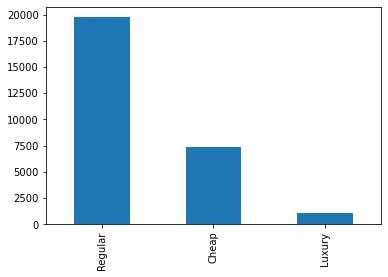

In [66]:
# Visualize (học sau)
df["GoodType"].value_counts().plot.bar()
plt.show()

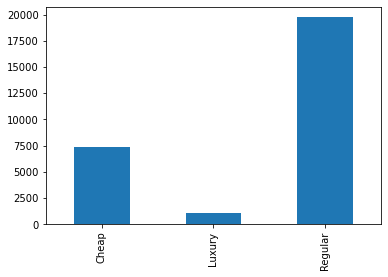

In [67]:
# Visualize (sort theo thứ tự category)
# Issue?
df["GoodType"].value_counts().sort_index().plot.bar()
plt.show()

- Convert cột `GoodType` sang dạng categorical. Why?
    - Tiết kiệm bộ nhớ
    - Cho phép order các level của category

In [68]:
df["GoodType"] = pd.Categorical(df["GoodType"], categories=["Cheap", "Regular", "Luxury"])
df.dtypes

InvoiceNo        object
StockCode        object
Description      object
Quantity          int32
InvoiceDate      object
UnitPrice       float64
CustomerID      float64
Country          object
GoodType       category
dtype: object

In [69]:
# Distribution (now ordered)
df["GoodType"].value_counts().sort_index()

Cheap       7364
Regular    19735
Luxury      1122
Name: GoodType, dtype: int64

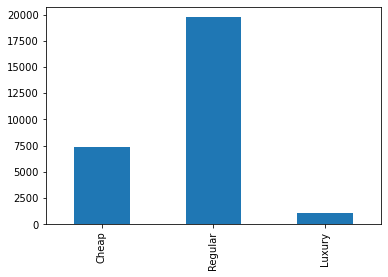

In [70]:
# Plot
df["GoodType"].value_counts().sort_index().plot.bar()
plt.show()

### 5.2.Cách 2: dùng `pd.cut`

In [71]:
# Cut (auto labeling)
bins = [-np.infty, 1, 10, np.infty]
df["GoodType"] = pd.cut(df["UnitPrice"], bins=bins, right=False)

In [72]:
# Check
df["GoodType"].value_counts().sort_index()

[-inf, 1.0)     7364
[1.0, 10.0)    19735
[10.0, inf)     1122
Name: GoodType, dtype: int64

In [73]:
# Cut (customized labeling)
bins = [-np.infty, 1, 10, np.infty]
labels = ["Cheap", "Regular", "Luxury"]
df["GoodType"] = pd.cut(df["UnitPrice"], bins=bins, labels=labels, right=False)

In [74]:
# Check
df["GoodType"].value_counts().sort_index()

Cheap       7364
Regular    19735
Luxury      1122
Name: GoodType, dtype: int64

## 6. Sắp xếp hàng

In [75]:
# Preview
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom,Regular


In [76]:
# Đổi cột `InvoiceDate` về dạng ngày tháng
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,2011-07-08 16:11:00,1.63,NaN,United Kingdom,Regular


In [77]:
# Sắp xếp các cột theo đơn giá từ thấp đến cao
df.sort_values("UnitPrice").head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
22437,561354,21792,NaN,-8,2011-07-26 14:50:00,0.0,NaN,United Kingdom,Cheap
23622,561505,84925D,NaN,-12,2011-07-27 14:16:00,0.0,NaN,United Kingdom,Cheap
7508,560114,75172,NaN,-35,2011-07-15 09:53:00,0.0,NaN,United Kingdom,Cheap


In [78]:
# Sắp xếp các cột theo đơn giá từ thấp đến cao
df.sort_values("UnitPrice", ascending=False).head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
5214,C559917,AMAZONFEE,AMAZON FEE,-1,2011-07-13 15:21:00,6497.47,NaN,United Kingdom,Luxury
5213,C559915,AMAZONFEE,AMAZON FEE,-1,2011-07-13 15:18:00,4383.62,NaN,United Kingdom,Luxury
10828,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,NaN,United Kingdom,Luxury


In [79]:
# Sắp xếp các cột theo ngày (nhỏ -> lớn) và sau đó theo đơn giá (nhỏ -> lớn)
df.sort_values(["InvoiceDate", "UnitPrice"]).head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
11,559518,22893,MINI CAKE STAND T-LIGHT HOLDER,6,2011-07-08 16:11:00,0.83,NaN,United Kingdom,Cheap
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,2011-07-08 16:11:00,1.63,NaN,United Kingdom,Regular
3,559518,22297,HEART IVORY TRELLIS SMALL,1,2011-07-08 16:11:00,2.46,NaN,United Kingdom,Regular


In [80]:
# Sắp xếp các cột theo ngày (lớn -> nhỏ) và sau đó theo đơn giá (lớn -> nhỏ)
df.sort_values(["InvoiceDate", "UnitPrice"], ascending=False).head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
28208,561903,48188,DOORMAT WELCOME PUPPIES,2,2011-07-31 16:04:00,7.95,17162.0,United Kingdom,Regular
28209,561903,22365,DOORMAT RESPECTABLE HOUSE,2,2011-07-31 16:04:00,7.95,17162.0,United Kingdom,Regular
28217,561903,48187,DOORMAT NEW ENGLAND,2,2011-07-31 16:04:00,7.95,17162.0,United Kingdom,Regular


In [81]:
# Sắp xếp các cột theo ngày (nhỏ -> lớn) và sau đó theo đơn giá (lớn -> nhỏ)
df.sort_values(["InvoiceDate", "UnitPrice"], ascending=[True, False]).head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
18,559518,DOT,DOTCOM POSTAGE,1,2011-07-08 16:11:00,92.88,NaN,United Kingdom,Luxury
2,559518,22179,SET 10 NIGHT OWL LIGHTS,1,2011-07-08 16:11:00,13.29,NaN,United Kingdom,Luxury
5,559518,22357,KINGS CHOICE BISCUIT TIN,1,2011-07-08 16:11:00,8.29,NaN,United Kingdom,Regular


## 7. Lấy top N rows

In [82]:
# Top 5 dòng có unit price cao nhất
df.nlargest(3, "UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
5214,C559917,AMAZONFEE,AMAZON FEE,-1,2011-07-13 15:21:00,6497.47,NaN,United Kingdom,Luxury
5213,C559915,AMAZONFEE,AMAZON FEE,-1,2011-07-13 15:18:00,4383.62,NaN,United Kingdom,Luxury
10827,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom,Luxury


In [83]:
# Top 5 dòng có unit price thấp nhất
df.nsmallest(3, "UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GoodType
1073,559602,84686,NaN,23,2011-07-11 11:26:00,0.0,NaN,United Kingdom,Cheap
1074,559603,79337,NaN,1,2011-07-11 11:27:00,0.0,NaN,United Kingdom,Cheap
1075,559604,22084,NaN,3,2011-07-11 11:27:00,0.0,NaN,United Kingdom,Cheap
